# Shivank Gupta
# Task 4
Decision tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
data=pd.read_csv("iris.csv")

In [12]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

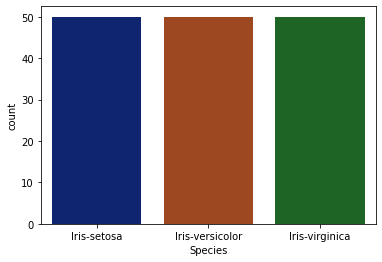

In [19]:
sns.countplot(data['Species'],palette='dark')

# Univariate analysis

Text(0.5, 1.0, 'Sepal length variation variation')

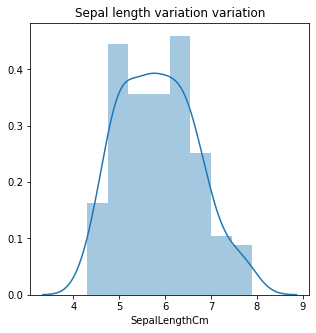

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(data['SepalLengthCm'])
plt.title("Sepal length variation variation")

Text(0.5, 1.0, 'Sepal width variation variation')

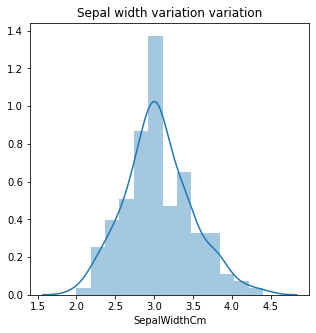

In [24]:
plt.figure(figsize=(5,5))
sns.distplot(data['SepalWidthCm'])
plt.title("Sepal width variation variation")

Text(0.5, 1.0, 'Petal length variation variation')

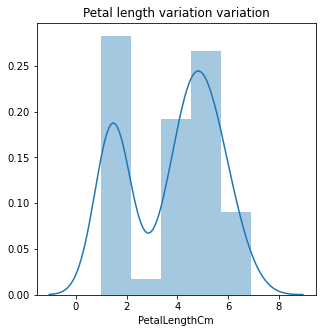

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(data['PetalLengthCm'])
plt.title("Petal length variation variation")

Text(0.5, 1.0, 'Petal width variation variation')

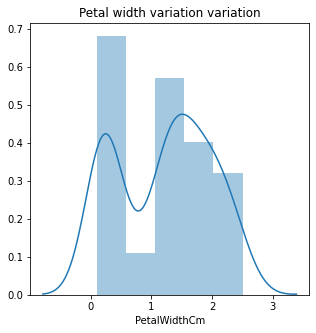

In [26]:
plt.figure(figsize=(5,5))
sns.distplot(data['PetalWidthCm'])
plt.title("Petal width variation variation")

# Bivariate Analysis

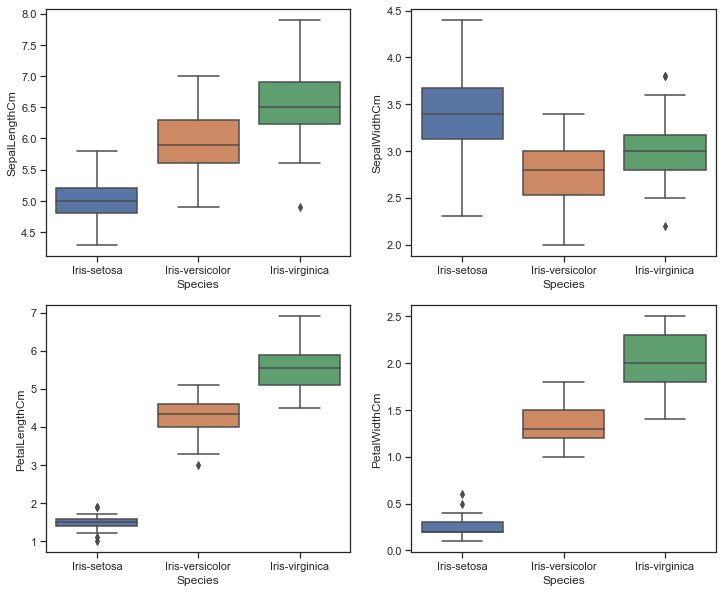

In [32]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

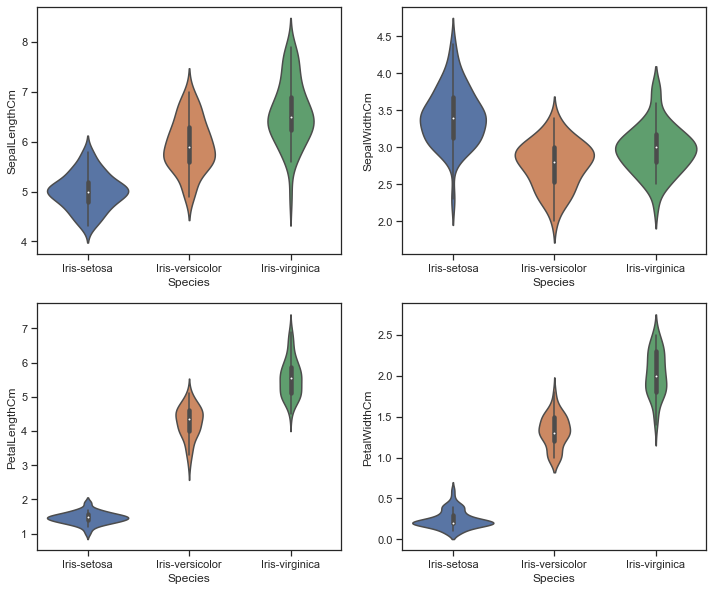

In [30]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

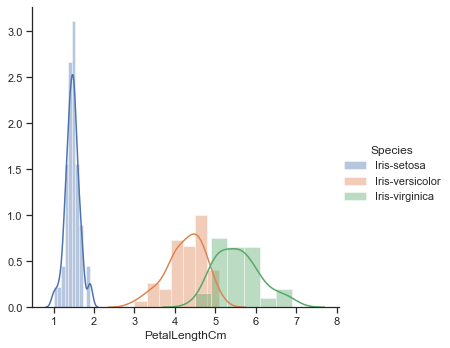

In [42]:
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "PetalLengthCm").add_legend()

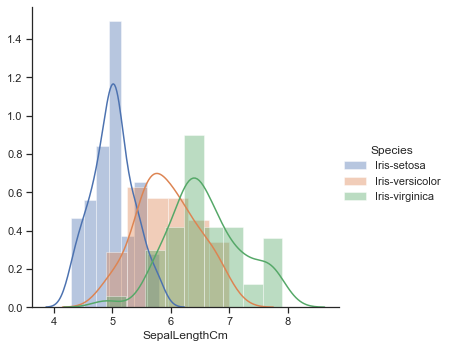

In [41]:
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "SepalLengthCm").add_legend()

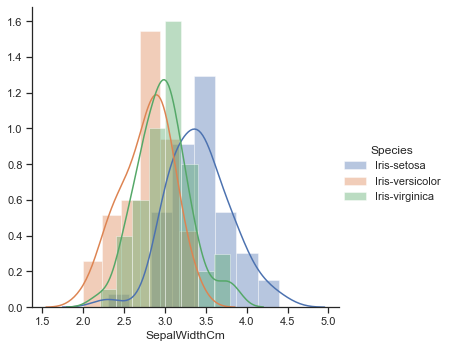

In [43]:
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "SepalWidthCm").add_legend()

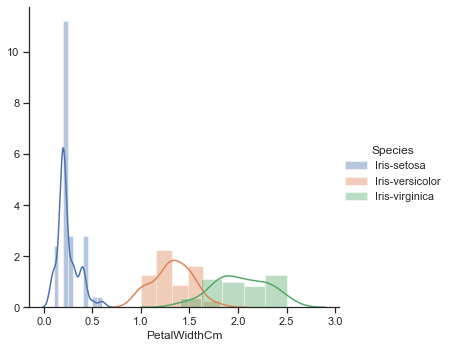

In [45]:
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "PetalWidthCm").add_legend()

# Model Training

In [55]:
X=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values


In [57]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
dtf.score(X_test,y_test)

0.9736842105263158

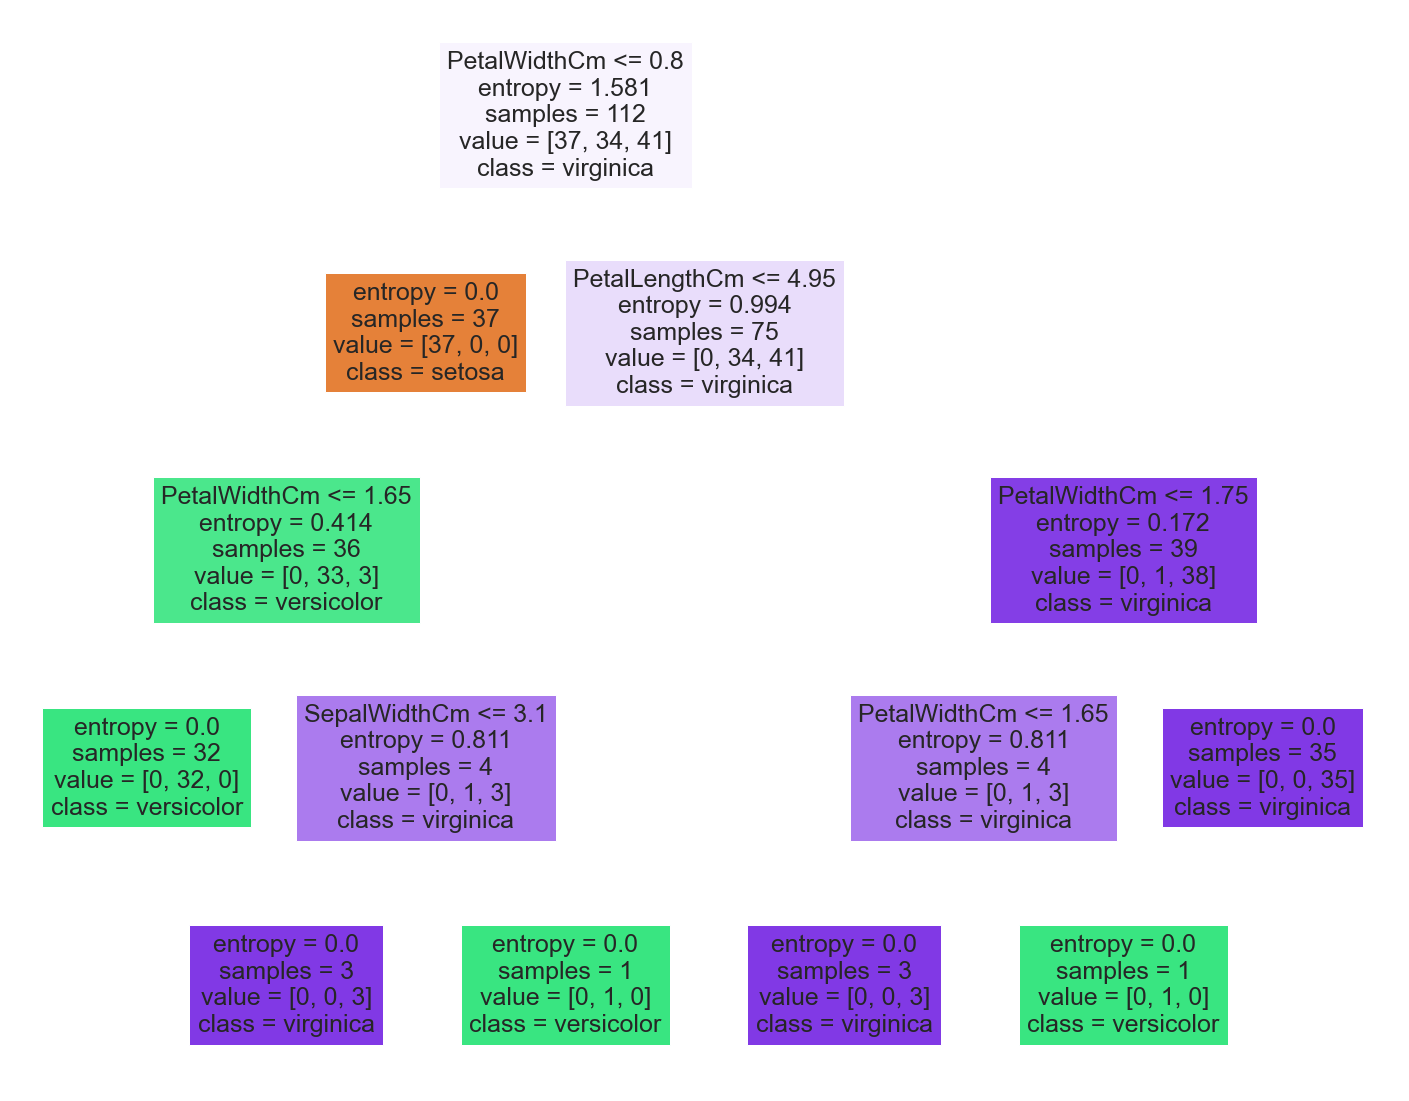

In [84]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtf, 
                   feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)

In [85]:
y_pred=dtf.predict(X_test)

In [67]:
df=pd.DataFrame({"Adtual":y_test,"predicted":y_pred})
df.head(10)

,Adtual,predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print("confusion matrix")
print(cm)
print("ACCURACY :",acc )

confusion matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
ACCURACY : 0.9736842105263158
